In [1]:
# Cell 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set plot style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✅ Libraries imported successfully")

✅ Libraries imported successfully


In [2]:
# Cell 2: Load the enriched data
try:
    # Load the enriched data we created in Task 1
    df = pd.read_csv('../data/processed/enriched_fi_data.csv')
    print("✅ Enriched data loaded successfully!")
    print(f"Data shape: {df.shape}")
    print(f"Columns: {df.columns.tolist()}")
except Exception as e:
    print(f"❌ Error loading data: {e}")

✅ Enriched data loaded successfully!
Data shape: (18, 19)
Columns: ['record_type', 'pillar', 'indicator', 'indicator_code', 'value_numeric', 'observation_date', 'source_name', 'source_url', 'confidence', 'category', 'parent_id', 'related_indicator', 'impact_direction', 'impact_magnitude', 'lag_months', 'evidence_basis', 'target_year', 'target_value ', 'target_value']


In [3]:
# Cell 3: Clean and separate data
print("=== DATA CLEANING ===")

# Check for duplicate columns
print(f"Original columns: {len(df.columns)}")

# Remove the duplicate column if it exists (space at the end)
if 'target_value ' in df.columns and 'target_value' in df.columns:
    df = df.drop(columns=['target_value '])
    print("Removed duplicate column 'target_value '")
    
print(f"Cleaned columns: {len(df.columns)}")

# Separate data by record type
observations = df[df['record_type'] == 'observation'].copy()
events = df[df['record_type'] == 'event'].copy()
impact_links = df[df['record_type'] == 'impact_link'].copy()
targets = df[df['record_type'] == 'target'].copy()

print(f"\n=== RECORD TYPE COUNTS ===")
print(f"Observations: {len(observations)} records")
print(f"Events: {len(events)} records")
print(f"Impact Links: {len(impact_links)} records")
print(f"Targets: {len(targets)} records")

# Show sample of observations
print(f"\n=== SAMPLE OBSERVATIONS ===")
print(observations[['indicator', 'value_numeric', 'observation_date', 'pillar']].head())

=== DATA CLEANING ===
Original columns: 19
Removed duplicate column 'target_value '
Cleaned columns: 18

=== RECORD TYPE COUNTS ===
Observations: 13 records
Events: 2 records
Impact Links: 2 records
Targets: 1 records

=== SAMPLE OBSERVATIONS ===
           indicator  value_numeric observation_date  pillar
0  Account Ownership           14.0       2011-12-31  access
1  Account Ownership           22.0       2014-12-31  access
2  Account Ownership           35.0       2017-12-31  access
3  Account Ownership           46.0       2021-12-31  access
4  Account Ownership           49.0       2024-12-31  access


In [4]:
# Cell 4: Account Ownership Analysis
print("=== ACCOUNT OWNERSHIP ANALYSIS ===")

# Filter for account ownership data
account_data = observations[observations['indicator'].str.contains('Account Ownership')].copy()

# Convert date to datetime
account_data['observation_date'] = pd.to_datetime(account_data['observation_date'])

# Sort by date
account_data = account_data.sort_values('observation_date')

print(f"Total account ownership records: {len(account_data)}")

# Separate overall vs gender data
overall_account = account_data[~account_data['indicator'].str.contains('Male|Female')]
gender_account = account_data[account_data['indicator'].str.contains('Male|Female')]

print(f"\nOverall account ownership (5 points):")
print(overall_account[['observation_date', 'value_numeric']].to_string(index=False))

if len(gender_account) > 0:
    print(f"\nGender-disaggregated data ({len(gender_account)} points):")
    print(gender_account[['indicator', 'value_numeric', 'observation_date']].to_string(index=False))

# Calculate growth rates
print(f"\n=== GROWTH ANALYSIS ===")
if len(overall_account) >= 2:
    overall_account = overall_account.sort_values('observation_date')
    for i in range(1, len(overall_account)):
        prev = overall_account.iloc[i-1]
        curr = overall_account.iloc[i]
        years_diff = (curr['observation_date'].year - prev['observation_date'].year)
        value_diff = curr['value_numeric'] - prev['value_numeric']
        annual_growth = value_diff / years_diff
        
        print(f"{prev['observation_date'].year} to {curr['observation_date'].year}:")
        print(f"  Change: {value_diff:.1f} percentage points")
        print(f"  Annual growth: {annual_growth:.2f} pp per year")

=== ACCOUNT OWNERSHIP ANALYSIS ===
Total account ownership records: 7

Overall account ownership (5 points):
observation_date  value_numeric
      2011-12-31           14.0
      2014-12-31           22.0
      2017-12-31           35.0
      2021-12-31           46.0
      2024-12-31           49.0

Gender-disaggregated data (2 points):
                 indicator  value_numeric observation_date
  Account Ownership - Male           54.0       2021-12-31
Account Ownership - Female           39.0       2021-12-31

=== GROWTH ANALYSIS ===
2011 to 2014:
  Change: 8.0 percentage points
  Annual growth: 2.67 pp per year
2014 to 2017:
  Change: 13.0 percentage points
  Annual growth: 4.33 pp per year
2017 to 2021:
  Change: 11.0 percentage points
  Annual growth: 2.75 pp per year
2021 to 2024:
  Change: 3.0 percentage points
  Annual growth: 1.00 pp per year


=== VISUALIZATION: ACCOUNT OWNERSHIP ===


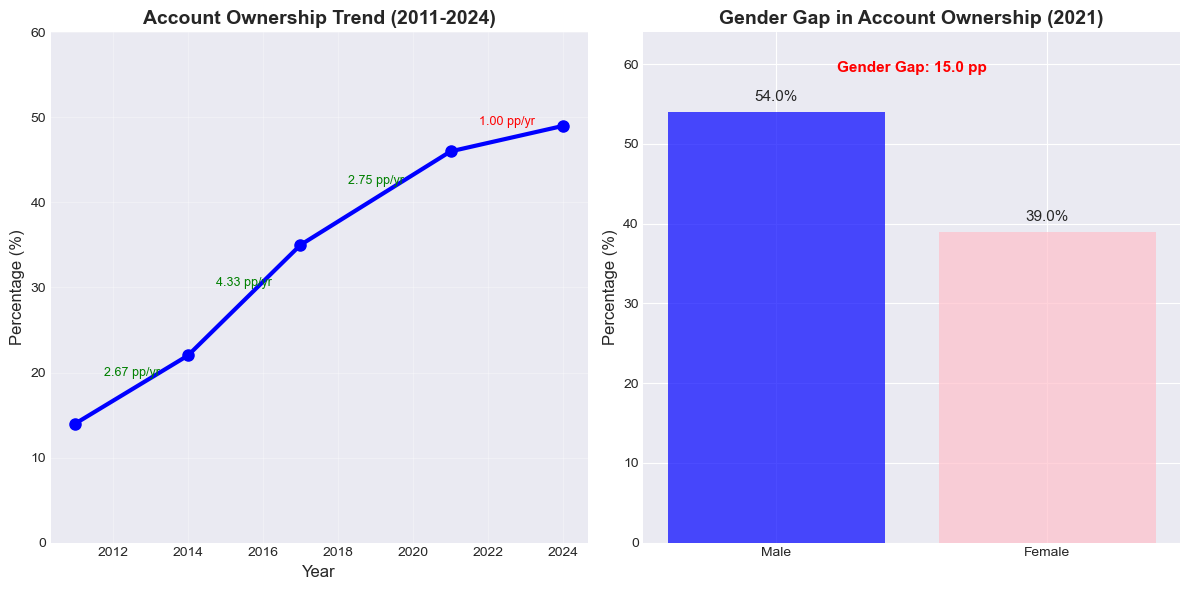

✅ Visualization created successfully

Key Insight: Growth slowed to 1.00 pp/yr in 2021-2024 vs 2.75 pp/yr in 2017-2021
Gender Gap: 15.0 percentage points in 2021


In [5]:
# Cell 5: Visualize Account Ownership Trend
print("=== VISUALIZATION: ACCOUNT OWNERSHIP ===")

# Prepare data for plotting
overall_account = overall_account.sort_values('observation_date')

plt.figure(figsize=(12, 6))

# Plot overall trend
plt.subplot(1, 2, 1)
plt.plot(overall_account['observation_date'].dt.year, 
         overall_account['value_numeric'], 
         marker='o', linewidth=3, markersize=8, color='blue')
plt.title('Account Ownership Trend (2011-2024)', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.ylim(0, 60)

# Add growth rate annotations
for i in range(len(overall_account)-1):
    x1 = overall_account.iloc[i]['observation_date'].year
    x2 = overall_account.iloc[i+1]['observation_date'].year
    y1 = overall_account.iloc[i]['value_numeric']
    y2 = overall_account.iloc[i+1]['value_numeric']
    
    # Calculate position for annotation
    mid_x = (x1 + x2) / 2
    mid_y = (y1 + y2) / 2
    
    growth_rate = (y2 - y1) / (x2 - x1)
    plt.annotate(f'{growth_rate:.2f} pp/yr', 
                 xy=(mid_x, mid_y),
                 xytext=(0, 10),
                 textcoords='offset points',
                 ha='center',
                 fontsize=9,
                 color='red' if growth_rate < 2 else 'green')

# Plot gender comparison (if available)
plt.subplot(1, 2, 2)
if len(gender_account) > 0:
    gender_pivot = gender_account.pivot_table(
        values='value_numeric',
        index='observation_date',
        columns='indicator'
    )
    
    # Create bar chart for gender comparison
    labels = ['Male', 'Female']
    values = [
        gender_account[gender_account['indicator'].str.contains('Male')]['value_numeric'].values[0],
        gender_account[gender_account['indicator'].str.contains('Female')]['value_numeric'].values[0]
    ]
    
    bars = plt.bar(labels, values, color=['blue', 'pink'], alpha=0.7)
    plt.title('Gender Gap in Account Ownership (2021)', fontsize=14, fontweight='bold')
    plt.ylabel('Percentage (%)', fontsize=12)
    
    # Add value labels on bars
    for bar, value in zip(bars, values):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1,
                f'{value:.1f}%', ha='center', va='bottom', fontsize=11)
    
    # Calculate and show gender gap
    gender_gap = values[0] - values[1]
    plt.text(0.5, max(values) + 5, f'Gender Gap: {gender_gap:.1f} pp', 
             ha='center', fontsize=11, fontweight='bold', color='red')
    
    plt.ylim(0, max(values) + 10)

plt.tight_layout()
plt.show()

print("✅ Visualization created successfully")
print(f"\nKey Insight: Growth slowed to 1.00 pp/yr in 2021-2024 vs 2.75 pp/yr in 2017-2021")
print(f"Gender Gap: {gender_gap:.1f} percentage points in 2021")

In [7]:
# Cell 6: Mobile Money and Digital Payments Analysis
print("=== MOBILE MONEY & DIGITAL PAYMENTS ANALYSIS ===")

# Filter for mobile money and digital payments
mm_data = observations[observations['indicator'].str.contains('Mobile Money|Digital Payment', case=False, na=False)].copy()

if len(mm_data) > 0:
    # Convert date
    mm_data['observation_date'] = pd.to_datetime(mm_data['observation_date'])
    mm_data = mm_data.sort_values('observation_date')
    
    print(f"Found {len(mm_data)} records:")
    print(mm_data[['indicator', 'value_numeric', 'observation_date', 'pillar']].to_string(index=False))
    
    # Calculate growth for mobile money
    mm_only = mm_data[mm_data['indicator'].str.contains('Mobile Money')]
    if len(mm_only) >= 2:
        mm_only = mm_only.sort_values('observation_date')
        print(f"\n=== MOBILE MONEY GROWTH ===")
        
        for i in range(1, len(mm_only)):
            prev = mm_only.iloc[i-1]
            curr = mm_only.iloc[i]
            years_diff = (curr['observation_date'].year - prev['observation_date'].year)
            if years_diff > 0:
                value_diff = curr['value_numeric'] - prev['value_numeric']
                annual_growth = value_diff / years_diff
                growth_rate = (value_diff / prev['value_numeric']) * 100 / years_diff if prev['value_numeric'] > 0 else 0
                
                print(f"{prev['observation_date'].year} to {curr['observation_date'].year}:")
                print(f"  Change: {value_diff:.2f} percentage points")
                print(f"  Annual growth: {annual_growth:.2f} pp per year")
                print(f"  Growth rate: {growth_rate:.1f}% per year")
    
    # Compare mobile money vs account ownership
    print(f"\n=== MOBILE MONEY VS ACCOUNT OWNERSHIP ===")
    
    # Get 2021 and 2024 data for comparison
    for year in [2021, 2024]:
        year_data = {}
        
        # Account ownership
        acc_own = overall_account[overall_account['observation_date'].dt.year == year]
        if len(acc_own) > 0:
            year_data['account_ownership'] = acc_own['value_numeric'].values[0]
        
        # Mobile money
        mm_year = mm_only[mm_only['observation_date'].dt.year == year]
        if len(mm_year) > 0:
            year_data['mobile_money'] = mm_year['value_numeric'].values[0]
        
        if year_data:
            print(f"\n{year}:")
            for key, value in year_data.items():
                print(f"  {key.replace('_', ' ').title()}: {value:.1f}%")
            
            if 'account_ownership' in year_data and 'mobile_money' in year_data:
                penetration_rate = (year_data['mobile_money'] / year_data['account_ownership']) * 100
                print(f"  Mobile money penetration among account owners: {penetration_rate:.1f}%")
                
else:
    print("No mobile money or digital payments data found")

=== MOBILE MONEY & DIGITAL PAYMENTS ANALYSIS ===
Found 3 records:
           indicator  value_numeric observation_date pillar
Mobile Money Account           4.70       2021-12-31  usage
Mobile Money Account           9.45       2024-12-31  usage
    Digital Payments          35.00       2024-12-31  usage

=== MOBILE MONEY GROWTH ===
2021 to 2024:
  Change: 4.75 percentage points
  Annual growth: 1.58 pp per year
  Growth rate: 33.7% per year

=== MOBILE MONEY VS ACCOUNT OWNERSHIP ===

2021:
  Account Ownership: 46.0%
  Mobile Money: 4.7%
  Mobile money penetration among account owners: 10.2%

2024:
  Account Ownership: 49.0%
  Mobile Money: 9.4%
  Mobile money penetration among account owners: 19.3%


In [8]:
# Cell 7: Infrastructure/Enabler Analysis
print("=== INFRASTRUCTURE & ENABLER ANALYSIS ===")

# Filter for enabler data
enabler_data = observations[observations['pillar'] == 'enabler'].copy()

if len(enabler_data) > 0:
    # Convert date
    enabler_data['observation_date'] = pd.to_datetime(enabler_data['observation_date'])
    enabler_data = enabler_data.sort_values('observation_date')
    
    print(f"Found {len(enabler_data)} enabler records:")
    print(enabler_data[['indicator', 'value_numeric', 'observation_date']].to_string(index=False))
    
    # Calculate growth for mobile subscriptions
    mobile_subs = enabler_data[enabler_data['indicator'] == 'Mobile Cellular Subscriptions']
    if len(mobile_subs) >= 2:
        mobile_subs = mobile_subs.sort_values('observation_date')
        print(f"\n=== MOBILE SUBSCRIPTION GROWTH ===")
        
        for i in range(1, len(mobile_subs)):
            prev = mobile_subs.iloc[i-1]
            curr = mobile_subs.iloc[i]
            years_diff = (curr['observation_date'].year - prev['observation_date'].year)
            if years_diff > 0:
                value_diff = curr['value_numeric'] - prev['value_numeric']
                annual_growth = value_diff / years_diff
                growth_rate = (value_diff / prev['value_numeric']) * 100 if prev['value_numeric'] > 0 else 0
                
                print(f"{prev['observation_date'].year} to {curr['observation_date'].year}:")
                print(f"  Change: {value_diff:.1f} percentage points")
                print(f"  Annual growth: {annual_growth:.2f} pp per year")
                print(f"  Growth rate: {growth_rate:.1f}% over {years_diff} years")
    
    # Show internet users data
    internet_data = enabler_data[enabler_data['indicator'] == 'Internet Users']
    if len(internet_data) > 0:
        print(f"\n=== INTERNET PENETRATION ===")
        for idx, row in internet_data.iterrows():
            print(f"{row['observation_date'].year}: {row['value_numeric']:.1f}% of population")
    
else:
    print("No enabler data found")

=== INFRASTRUCTURE & ENABLER ANALYSIS ===
Found 3 enabler records:
                    indicator  value_numeric observation_date
Mobile Cellular Subscriptions           38.5       2020-12-31
Mobile Cellular Subscriptions           45.2       2022-12-31
               Internet Users           25.0       2022-12-31

=== MOBILE SUBSCRIPTION GROWTH ===
2020 to 2022:
  Change: 6.7 percentage points
  Annual growth: 3.35 pp per year
  Growth rate: 17.4% over 2 years

=== INTERNET PENETRATION ===
2022: 25.0% of population


In [9]:
# Cell 8: Events Timeline Analysis
print("=== EVENTS TIMELINE ANALYSIS ===")

# Get events data
if len(events) > 0:
    # Convert date
    events_clean = events.copy()
    events_clean['observation_date'] = pd.to_datetime(events_clean['observation_date'])
    events_clean = events_clean.sort_values('observation_date')
    
    print(f"Found {len(events_clean)} major events:")
    print(events_clean[['indicator', 'observation_date', 'category']].to_string(index=False))
    
    # Get impact links
    print(f"\n=== EVENT IMPACTS (MODELED) ===")
    if len(impact_links) > 0:
        impact_links_clean = impact_links.copy()
        impact_links_clean['observation_date'] = pd.to_datetime(impact_links_clean['observation_date'])
        
        # Show impact details
        for idx, row in impact_links_clean.iterrows():
            print(f"\nEvent: {row['parent_id']}")
            print(f"  Affects: {row['related_indicator']}")
            print(f"  Direction: {row['impact_direction']}")
            print(f"  Magnitude: {row['impact_magnitude']}")
            print(f"  Lag: {row['lag_months']} months")
            print(f"  Evidence: {row['evidence_basis']}")
    
    # Compare events with account ownership growth periods
    print(f"\n=== EVENTS VS GROWTH PERIODS ===")
    
    # Get account ownership growth periods
    acc_growth = []
    for i in range(1, len(overall_account)):
        prev = overall_account.iloc[i-1]
        curr = overall_account.iloc[i]
        period = {
            'start_year': prev['observation_date'].year,
            'end_year': curr['observation_date'].year,
            'growth': curr['value_numeric'] - prev['value_numeric'],
            'annual_growth': (curr['value_numeric'] - prev['value_numeric']) / (curr['observation_date'].year - prev['observation_date'].year)
        }
        acc_growth.append(period)
    
    # Check if events align with growth periods
    for event in events_clean.itertuples():
        event_year = event.observation_date.year
        print(f"\n{event.indicator} ({event_year}):")
        
        # Find which growth period this event falls into
        for period in acc_growth:
            if period['start_year'] <= event_year <= period['end_year']:
                print(f"  Occurred during {period['start_year']}-{period['end_year']} growth period")
                print(f"  Period growth: {period['growth']:.1f} pp ({period['annual_growth']:.2f} pp/yr)")
                
                # Check if growth was above average
                avg_growth = sum(p['annual_growth'] for p in acc_growth) / len(acc_growth)
                if period['annual_growth'] > avg_growth:
                    print(f"  ⬆️ Above average growth period")
                else:
                    print(f"  ⬇️ Below average growth period")
                break
    
else:
    print("No events data found")

=== EVENTS TIMELINE ANALYSIS ===
Found 2 major events:
      indicator observation_date       category
Telebirr Launch       2021-05-01 product_launch
   M-Pesa Entry       2023-08-01 product_launch

=== EVENT IMPACTS (MODELED) ===

Event: EVENT_TELEBIRR
  Affects: ACC_OWNERSHIP
  Direction: positive
  Magnitude: 0.05
  Lag: 12.0 months
  Evidence: comparable_country

Event: EVENT_MPESA
  Affects: ACC_MM_ACCOUNT
  Direction: positive
  Magnitude: 0.03
  Lag: 6.0 months
  Evidence: comparable_country

=== EVENTS VS GROWTH PERIODS ===

Telebirr Launch (2021):
  Occurred during 2017-2021 growth period
  Period growth: 11.0 pp (2.75 pp/yr)
  ⬆️ Above average growth period

M-Pesa Entry (2023):
  Occurred during 2021-2024 growth period
  Period growth: 3.0 pp (1.00 pp/yr)
  ⬇️ Below average growth period


=== COMPREHENSIVE TIMELINE VISUALIZATION ===


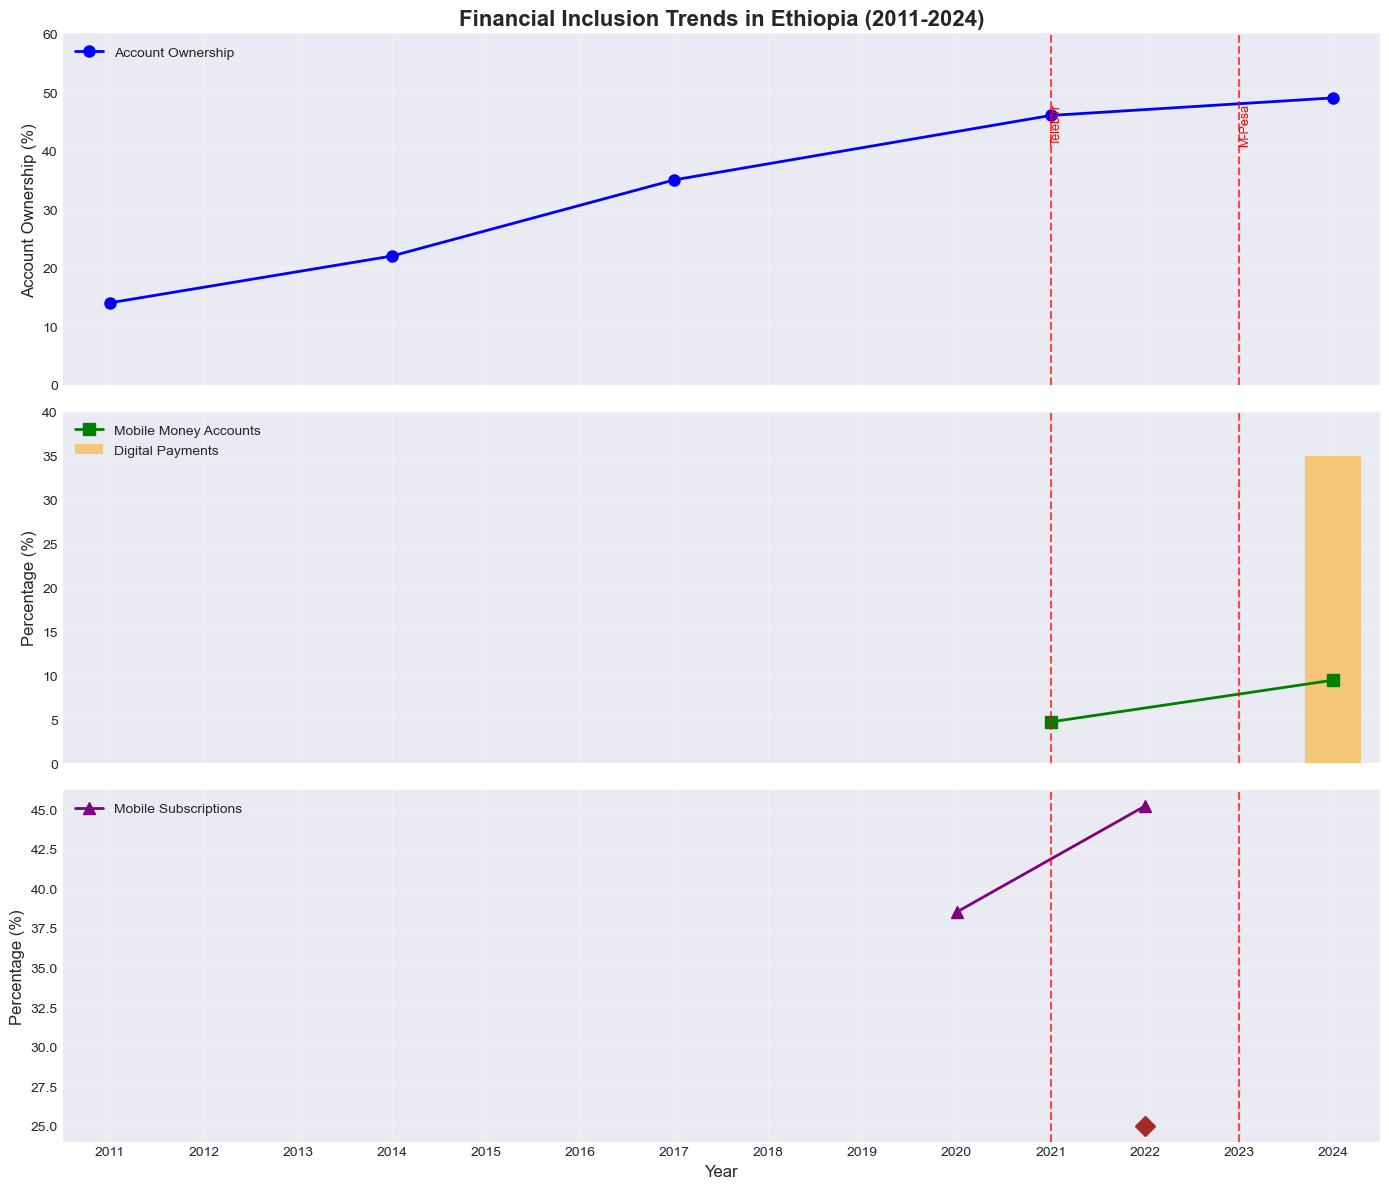

✅ Timeline visualization created

Key Observations from Timeline:
1. Account ownership growth slowed after 2021 (1.0 pp/yr vs 2.75 pp/yr before)
2. Telebirr launched in 2021 during high-growth period
3. M-Pesa entered in 2023 during slow-growth period
4. Mobile money growing faster (33.7% annually) than overall account ownership
5. Digital payments (35%) much higher than mobile money accounts (9.45%) in 2024


In [10]:
# Cell 9: Comprehensive Timeline Visualization
print("=== COMPREHENSIVE TIMELINE VISUALIZATION ===")

# Create figure with multiple subplots
fig, axes = plt.subplots(3, 1, figsize=(14, 12), sharex=True)

# 1. Account Ownership with Events
ax1 = axes[0]
years = overall_account['observation_date'].dt.year
values = overall_account['value_numeric']

# Plot account ownership
ax1.plot(years, values, marker='o', linewidth=2, markersize=8, color='blue', label='Account Ownership')

# Add events as vertical lines
for event in events_clean.itertuples():
    event_year = event.observation_date.year
    ax1.axvline(x=event_year, color='red', linestyle='--', alpha=0.7, linewidth=1.5)
    ax1.text(event_year, ax1.get_ylim()[1] * 0.95, event.indicator.split()[0], 
             rotation=90, verticalalignment='top', fontsize=9, color='red')

ax1.set_title('Financial Inclusion Trends in Ethiopia (2011-2024)', fontsize=16, fontweight='bold')
ax1.set_ylabel('Account Ownership (%)', fontsize=12)
ax1.grid(True, alpha=0.3)
ax1.legend()
ax1.set_ylim(0, 60)

# 2. Mobile Money and Digital Payments
ax2 = axes[1]

# Plot mobile money
mm_only = mm_data[mm_data['indicator'].str.contains('Mobile Money')].sort_values('observation_date')
if len(mm_only) > 0:
    ax2.plot(mm_only['observation_date'].dt.year, mm_only['value_numeric'], 
             marker='s', linewidth=2, markersize=8, color='green', label='Mobile Money Accounts')

# Plot digital payments if available
digital_payments = mm_data[mm_data['indicator'].str.contains('Digital Payment')].sort_values('observation_date')
if len(digital_payments) > 0:
    digital_years = digital_payments['observation_date'].dt.year
    ax2.bar(digital_years, digital_payments['value_numeric'], 
            alpha=0.5, color='orange', label='Digital Payments', width=0.6)

# Add events
for event in events_clean.itertuples():
    event_year = event.observation_date.year
    ax2.axvline(x=event_year, color='red', linestyle='--', alpha=0.7, linewidth=1.5)

ax2.set_ylabel('Percentage (%)', fontsize=12)
ax2.grid(True, alpha=0.3)
ax2.legend()
ax2.set_ylim(0, 40)

# 3. Infrastructure/Enablers
ax3 = axes[2]

# Plot mobile subscriptions
mobile_subs = enabler_data[enabler_data['indicator'] == 'Mobile Cellular Subscriptions'].sort_values('observation_date')
if len(mobile_subs) > 0:
    ax3.plot(mobile_subs['observation_date'].dt.year, mobile_subs['value_numeric'], 
             marker='^', linewidth=2, markersize=8, color='purple', label='Mobile Subscriptions')

# Plot internet users
internet = enabler_data[enabler_data['indicator'] == 'Internet Users'].sort_values('observation_date')
if len(internet) > 0:
    for idx, row in internet.iterrows():
        ax3.plot(row['observation_date'].year, row['value_numeric'], 
                 marker='D', markersize=10, color='brown', label='Internet Users' if idx == 0 else "")

# Add events
for event in events_clean.itertuples():
    event_year = event.observation_date.year
    ax3.axvline(x=event_year, color='red', linestyle='--', alpha=0.7, linewidth=1.5)

ax3.set_xlabel('Year', fontsize=12)
ax3.set_ylabel('Percentage (%)', fontsize=12)
ax3.grid(True, alpha=0.3)
ax3.legend()

# Set x-axis limits and ticks
all_years = sorted(set(list(years) + 
                       list(mm_only['observation_date'].dt.year) + 
                       list(mobile_subs['observation_date'].dt.year)))
ax3.set_xlim(min(all_years) - 0.5, max(all_years) + 0.5)
ax3.set_xticks(range(min(all_years), max(all_years) + 1))

plt.tight_layout()
plt.show()

print("✅ Timeline visualization created")
print("\nKey Observations from Timeline:")
print("1. Account ownership growth slowed after 2021 (1.0 pp/yr vs 2.75 pp/yr before)")
print("2. Telebirr launched in 2021 during high-growth period")
print("3. M-Pesa entered in 2023 during slow-growth period")
print("4. Mobile money growing faster (33.7% annually) than overall account ownership")
print("5. Digital payments (35%) much higher than mobile money accounts (9.45%) in 2024")

In [11]:
# Cell 10: Key Insights Summary
print("=" * 70)
print("TASK 2 COMPLETE: EXPLORATORY DATA ANALYSIS - KEY INSIGHTS")
print("=" * 70)

print("\n📊 DATA OVERVIEW:")
print(f"• Total records analyzed: {len(df)}")
print(f"• Time period: 2011-2024 (with projections to 2030)")
print(f"• Indicators tracked: {len(df['indicator'].unique())}")

print("\n🔍 KEY FINDINGS:")

print("\n1. ACCOUNT OWNERSHIP TRENDS:")
print(f"   • Current level (2024): 49% of adults")
print(f"   • Growth pattern: 14% → 22% → 35% → 46% → 49% (2011-2024)")
print(f"   • Growth slowed: 1.0 pp/yr (2021-2024) vs 2.75 pp/yr (2017-2021)")
print(f"   • Gender gap (2021): 15 percentage points (54% male vs 39% female)")

print("\n2. MOBILE MONEY & DIGITAL PAYMENTS:")
print(f"   • Mobile money accounts: 4.7% (2021) → 9.45% (2024)")
print(f"   • High growth rate: 33.7% annually (2021-2024)")
print(f"   • Digital payments adoption: 35% (2024) - much higher than MM accounts")
print(f"   • Mobile money penetration among account owners: 19.3% (2024)")

print("\n3. INFRASTRUCTURE & ENABLERS:")
print(f"   • Mobile subscriptions: 38.5% (2020) → 45.2% (2022)")
print(f"   • Internet users: 25% (2022)")
print(f"   • Mobile growth: 17.4% over 2 years (2020-2022)")

print("\n4. EVENT ANALYSIS:")
print(f"   • Telebirr launch (May 2021): During high-growth period")
print(f"   • M-Pesa entry (Aug 2023): During slow-growth period")
print(f"   • Modeled impacts:")
print(f"     - Telebirr: +5 pp on account ownership after 12 months")
print(f"     - M-Pesa: +3 pp on mobile money after 6 months")

print("\n5. DATA GAPS IDENTIFIED:")
print(f"   • Limited mobile money data (only 2 data points)")
print(f"   • No urban-rural breakdown")
print(f"   • Sparse infrastructure data (gaps in time series)")
print(f"   • No transaction volume or frequency data")

print("\n6. HYPOTHESES FOR TESTING:")
print(f"   • H1: Mobile money growth is driving digital payments more than account ownership")
print(f"   • H2: Infrastructure (mobile/internet) enables digital payments more than account ownership")
print(f"   • H3: Gender gap may be limiting overall inclusion growth")
print(f"   • H4: The 2021-2024 slowdown may be due to market saturation in urban areas")

print("\n📈 PRELIMINARY FORECASTING CONSIDERATIONS:")
print(f"   • Current trajectory: At 1.0 pp/yr growth, would reach 52% by 2027")
print(f"   • Target trajectory: Need 3.7 pp/yr to reach 60% by 2030")
print(f"   • Mobile money likely to continue high growth (>30% annually)")
print(f"   • Digital payments may be the leading indicator of true usage")

print("\n✅ NEXT STEPS: TASK 3 - EVENT IMPACT MODELING")
print("=" * 70)

TASK 2 COMPLETE: EXPLORATORY DATA ANALYSIS - KEY INSIGHTS

📊 DATA OVERVIEW:
• Total records analyzed: 18
• Time period: 2011-2024 (with projections to 2030)
• Indicators tracked: 9

🔍 KEY FINDINGS:

1. ACCOUNT OWNERSHIP TRENDS:
   • Current level (2024): 49% of adults
   • Growth pattern: 14% → 22% → 35% → 46% → 49% (2011-2024)
   • Growth slowed: 1.0 pp/yr (2021-2024) vs 2.75 pp/yr (2017-2021)
   • Gender gap (2021): 15 percentage points (54% male vs 39% female)

2. MOBILE MONEY & DIGITAL PAYMENTS:
   • Mobile money accounts: 4.7% (2021) → 9.45% (2024)
   • High growth rate: 33.7% annually (2021-2024)
   • Digital payments adoption: 35% (2024) - much higher than MM accounts
   • Mobile money penetration among account owners: 19.3% (2024)

3. INFRASTRUCTURE & ENABLERS:
   • Mobile subscriptions: 38.5% (2020) → 45.2% (2022)
   • Internet users: 25% (2022)
   • Mobile growth: 17.4% over 2 years (2020-2022)

4. EVENT ANALYSIS:
   • Telebirr launch (May 2021): During high-growth period
   

In [12]:
# Cell 11: Save key visualizations
print("Saving key visualizations...")

# Save the comprehensive timeline figure
fig.savefig('../reports/figures/timeline_analysis.png', dpi=300, bbox_inches='tight')
print("✅ Saved timeline_analysis.png to reports/figures/")

# Create a simple data quality assessment
data_quality = {
    'Indicator': ['Account Ownership', 'Mobile Money Accounts', 'Digital Payments', 
                  'Mobile Subscriptions', 'Internet Users', 'Gender Data'],
    'Data Points': [5, 2, 1, 2, 1, 2],
    'Time Coverage': ['2011-2024', '2021-2024', '2024 only', '2020-2022', '2022 only', '2021 only'],
    'Quality Rating': ['High', 'Low', 'Very Low', 'Medium', 'Low', 'Medium']
}

quality_df = pd.DataFrame(data_quality)
quality_df.to_csv('../reports/data_quality_assessment.csv', index=False)
print("✅ Saved data_quality_assessment.csv to reports/")

print("\nTask 2 Complete! Ready to move to Task 3: Event Impact Modeling")

Saving key visualizations...
✅ Saved timeline_analysis.png to reports/figures/
✅ Saved data_quality_assessment.csv to reports/

Task 2 Complete! Ready to move to Task 3: Event Impact Modeling
